# Loss Functions

In this exercise, you will compare the effects of Loss functions on a linear regression model.

👇 Import the data from the attached csv file

In [192]:
# YOUR CODE HERE
import pandas as pd
data=pd.read_csv("./data.csv")

🎯 Your task is to predict the average temperature inside a greenhouse based on its design. Your temperature predictions will help you select the appropriate greenhouse design for each plant, based on their climatic needs. 

🌿 You know that plants can handle small temperature variations, but are exponentially more sensitive as the temperature variations increase. 

## 1. Theory 

❓ Theoretically, which Loss function would you train your model on to limit the risk of killing plants?

<details>
<summary> 🆘 Answer </summary>
    
By theory, you would use a Mean Square Error (MSE) Loss function. It would penalize outlier predictions and prevent your model from committing large errors. This would ensure smaller temperature variations and a lower risk for plants.

</details>

> YOUR ANSWER HERE

## 2. Application

### 2.1 Preprocessing

👇 Scale the features

In [193]:
data.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Glazing Area,Average Temperature
0,0.98,514.5,294.0,110.25,7.0,0.0,18.44
1,0.98,514.5,294.0,110.25,7.0,0.0,18.44
2,0.98,514.5,294.0,110.25,7.0,0.0,18.44
3,0.98,514.5,294.0,110.25,7.0,0.0,18.44
4,0.90,563.5,318.5,122.50,7.0,0.0,24.56


<AxesSubplot:>

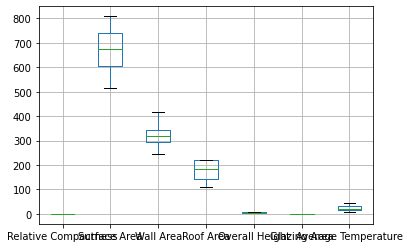

In [194]:
# YOUR CODE HERE
data.boxplot()

array([[<AxesSubplot:title={'center':'Relative Compactness'}>,
        <AxesSubplot:title={'center':'Surface Area'}>,
        <AxesSubplot:title={'center':'Wall Area'}>],
       [<AxesSubplot:title={'center':'Roof Area'}>,
        <AxesSubplot:title={'center':'Overall Height'}>,
        <AxesSubplot:title={'center':'Glazing Area'}>],
       [<AxesSubplot:title={'center':'Average Temperature'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

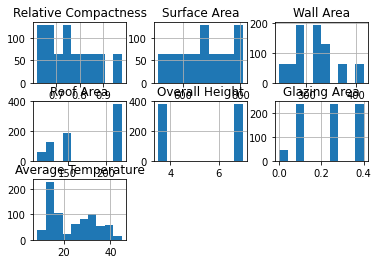

In [195]:
data.hist()

In [196]:
data.columns

Index(['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
       'Overall Height', 'Glazing Area', 'Average Temperature'],
      dtype='object')

In [197]:
from sklearn.preprocessing import RobustScaler

r_scaler=RobustScaler()
r_scaler.fit(data[['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
       'Overall Height', 'Glazing Area']])
data[['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
       'Overall Height', 'Glazing Area']]=r_scaler.transform(data[['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
       'Overall Height', 'Glazing Area']])
data.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Glazing Area,Average Temperature
0,1.559322,-1.181818,-0.5,-0.923077,0.5,-0.833333,18.44
1,1.559322,-1.181818,-0.5,-0.923077,0.5,-0.833333,18.44
2,1.559322,-1.181818,-0.5,-0.923077,0.5,-0.833333,18.44
3,1.559322,-1.181818,-0.5,-0.923077,0.5,-0.833333,18.44
4,1.016949,-0.818182,0.0,-0.769231,0.5,-0.833333,24.56


### 2.2 Modelling

In this section, you are going to verify the theory by evaluating models optimized on different Loss functions.

### Least Squares (MSE) Loss

👇 **10-Fold Cross-validate** a Linear Regression model optimized by **Stochastic Gradient Descent** (SGD) on a **Least Squares Loss** (MSE)



In [198]:
X=data.drop(columns=["Average Temperature"])
y=data["Average Temperature"]

In [199]:
y

0      18.440
1      18.440
2      18.440
3      18.440
4      24.560
        ...  
763    19.640
764    16.710
765    16.775
766    16.545
767    16.335
Name: Average Temperature, Length: 768, dtype: float64

In [200]:
#SGD MSE 
from sklearn.linear_model import SGDRegressor,LinearRegression
lin_reg=LinearRegression()
lin_reg_sgd_mse=SGDRegressor(loss="squared_loss")
lin_reg_sgd_mse



SGDRegressor()

👇 Compute 
- the mean cross validated R2 score `r2`
- the single biggest prediction error in °C of all your folds `max_error`?

(Tips: `max_error` is an accepted scoring metrics in sklearn)

In [201]:
# r2
from sklearn.model_selection import cross_validate
cv_score_lin_reg_sgd_r2=cross_validate(lin_reg_sgd_mse,X,y,cv=5,scoring="r2")
r2=cv_score_lin_reg_sgd_r2['test_score'].mean()
#https://stackoverflow.com/questions/21050110/sklearn-gridsearchcv-with-pipeline
r2



0.8942681738279242

In [1]:
# r2
from sklearn.model_selection import cross_validate
cv_score_lin_reg_sgd_r2=cross_validate(lin_reg_sgd_mse,X,y,cv=5,scoring="precision")
r2=cv_score_lin_reg_sgd_r2['test_score'].mean()
#https://stackoverflow.com/questions/21050110/sklearn-gridsearchcv-with-pipeline
r2



NameError: name 'lin_reg_sgd_mse' is not defined

In [ ]:
#max error
from sklearn.model_selection import cross_validate
cv_score_lin_reg_sgd_r2=cross_validate(lin_reg_sgd_mse,X,y,cv=5,scoring="max_error")
max_error=abs(cv_score_lin_reg_sgd_r2['test_score']).max()
#https://stackoverflow.com/questions/21050110/sklearn-gridsearchcv-with-pipeline
max_error

#increase 9.7 degree max 

### Mean Absolute Error (MAE) Loss

What if we optimize our model on the MAE instead?

👇 **10-Fold Cross-validate** a Linear Regression model optimized by **Stochastic Gradient Descent** (SGD) on a **MAE** Loss

<details>
<summary>💡 Hints</summary>

- MAE loss cannot be directly specified in `SGDRegressor`. It must be engineered by adjusting the right parameters

</details>

In [210]:
# SDG+MAE
# 10-Fold Cross-validate a Linear Regression model optimized by Stochastic Gradient Descent (SGD) on a MAE Loss
from sklearn.linear_model import SGDRegressor,LinearRegression
lin_reg=LinearRegression()
lin_reg_sgd_mae=SGDRegressor(epsilon=0,loss="epsilon_insensitive")
lin_reg_sgd_mae
#https://stackoverflow.com/questions/50392783/training-linear-models-with-mae-using-sklearn-in-python



SGDRegressor(epsilon=0, loss='epsilon_insensitive')

In [211]:
from sklearn.model_selection import cross_validate
cv_score_lin_reg_sgd_mae_r2=cross_validate(lin_reg_sgd_mae,X,y,cv=5,scoring="r2")
cv_score_lin_reg_sgd_mae_r2["test_score"].mean()

0.8282855291815501

In [212]:
r2_mae=cv_score_lin_reg_sgd_mae["test_score"].mean()

👇 Compute 
- the mean cross validated R2 score `r2_mae`
- the single biggest prediction error of all your folds `max_error_mae`?

In [213]:
#r2_mae
from sklearn.model_selection import cross_validate
cv_score_lin_reg_sgd_mae=cross_validate(lin_reg_sgd_mae,X,y,cv=5,scoring="r2")
r2_mae=cv_score_lin_reg_sgd_mae["test_score"].mean()
r2_mae

0.8285525078171364

In [214]:
#max_error_mae
from sklearn.model_selection import cross_validate
cv_score_lin_reg_sgd_mae=cross_validate(lin_reg_sgd_mae,X,y,cv=5,scoring="max_error")
max_error_mae=abs(cv_score_lin_reg_sgd_mae["test_score"]).max()
max_error_mae

#increase 14.15 degree max 

14.155823968540954

## 3. Conclusion

❓Which of the models you evaluated seems the most appropriate for your task?

<details>
<summary> 🆘Answer </summary>
    
Although mean cross-validated r2 scores are approximately similar between the two models, the one optimized on a MAE has more chance to make larger mistakes from time to time, increasing risk of killing plants!

    
</details>

> YOUR ANSWER HERE

# 🏁 Check your code

In [208]:
from nbresult import ChallengeResult

result = ChallengeResult('loss_functions',
    r2 = r2,
    r2_mae = r2_mae,
    max_error = max_error,
    max_error_mae = max_error_mae,                     
)
result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.10.0, pluggy-1.0.0 -- /Users/shu/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/shu/Desktop/Lewagon/code/shiro101010101/data-challenges/05-ML/04-Under-the-hood/01-Loss-Functions
plugins: dash-2.0.0, anyio-3.3.2
collecting ... collected 3 items

tests/test_loss_functions.py::TestLossFunctions::test_max_error_order PASSED [ 33%]
tests/test_loss_functions.py::TestLossFunctions::test_r2 PASSED          [ 66%]
tests/test_loss_functions.py::TestLossFunctions::test_r2_mae PASSED      [100%]

============================== 3 passed in 0.39s ===============================


💯 You can commit your code:

git add tests/loss_functions.pickle

git commit -m 'Completed loss_functions step'

git push origin master


In [ ]:
import pickle

# Export pipeline as pickle file
with open("pipeline.pkl", "wb") as file:
    pickle.dump(pipe_tuned, file)